In [2]:
# put all the libraries you need to import in this cell
import os
import pandas as pd 
import numpy as np
import seaborn as sns
from string import ascii_uppercase
from pandas import DataFrame
import matplotlib.pyplot as plt   
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report


from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score, roc_auc_score,roc_curve, auc, f1_score 




# <b> Exercise 1</b>

You are called to build up the best model based on the given data (<b>'hepatitis.csv'</b>) to predict wheather a patient is has Hepatitis B or not. To complete this task, you will proceed as follow: 
- prepare the data, 
- create training/testing sets, 
- instantiate the classifier, 
- train the classifier, 
- make predictions, 
- evaluate performance of classifier.

<b> 5 points bonus for first three best models</b>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 20 columns):
class             142 non-null int64
age               142 non-null int64
sex               142 non-null int64
steroid           142 non-null int64
antivirals        142 non-null int64
fatigue           142 non-null int64
malaise           142 non-null int64
anorexia          142 non-null int64
liver_big         142 non-null int64
liver_firm        142 non-null int64
spleen_palable    142 non-null int64
spiders           142 non-null int64
ascites           142 non-null int64
varices           142 non-null int64
bilirubin         142 non-null float64
alk_phosphate     142 non-null int64
sgot              142 non-null int64
albumin           142 non-null float64
protime           142 non-null int64
histology         142 non-null int64
dtypes: float64(2), int64(18)
memory usage: 22.3 KB


<Figure size 1368x1080 with 0 Axes>

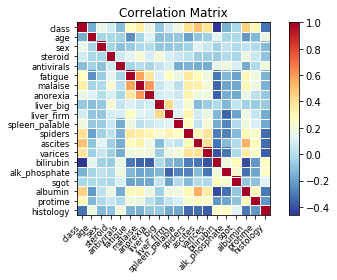

Accuracy of the KNN model: 0.86
              precision    recall  f1-score   support

           1       0.89      0.89      0.89        18
           2       0.82      0.82      0.82        11

    accuracy                           0.86        29
   macro avg       0.85      0.85      0.85        29
weighted avg       0.86      0.86      0.86        29

Accuracy of the logistic reg model: 0.79
              precision    recall  f1-score   support

           1       0.83      0.83      0.83        18
           2       0.73      0.73      0.73        11

    accuracy                           0.79        29
   macro avg       0.78      0.78      0.78        29
weighted avg       0.79      0.79      0.79        29

Accuracy of the Gaussian Naive Bayes model: 0.86
              precision    recall  f1-score   support

           1       1.00      0.82      0.90        22
           2       0.64      1.00      0.78         7

    accuracy                           0.86        29
   mac

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [3]:
data=pd.read_csv('hepatitis.csv')
data.head(60)
data.info()
data.isnull().sum()
data.describe()
data.corr()
cor=data.corr()
plt.figure(figsize=(19,15))
data['histology'].value_counts()
sm.graphics.plot_corr(cor, xnames=list(cor.columns))
plt.show()
X=data.drop(columns=["histology"])
y=data["histology"]
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.20, random_state= 42)
y.shape
X_test.shape

KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
y_KNN_pred = KNN_model.predict(X_test)
print('Accuracy of the KNN model: %.2f' %accuracy_score(y_KNN_pred, y_test))
print(classification_report(y_KNN_pred, y_test))


logistic= LogisticRegression(solver='lbfgs')
logistic.fit(X_train, y_train)
y_logistic_pred =logistic.predict(X_test)
print('Accuracy of the logistic reg model: %.2f' %accuracy_score(y_logistic_pred, y_test))
print(classification_report(y_logistic_pred, y_test))

GNB_model=GaussianNB()
GNB_model.fit(X_train, y_train)
y_GNB_pred=GNB_model.predict(X_test)
print('Accuracy of the Gaussian Naive Bayes model: %.2f' %accuracy_score(y_GNB_pred, y_test))
print(classification_report(y_GNB_pred, y_test))

Dt_model=DecisionTreeClassifier(max_depth=10,criterion="gini")
Dt_model.fit(X_train, y_train)
y_Dt_pred=Dt_model.predict(X_test)
print('Accuracy of the Decision Tree model: %.2f' %accuracy_score(y_Dt_pred, y_test))
print(classification_report(y_Dt_pred, y_test))


RF_model=RandomForestClassifier()
RF_model.fit(X_train, y_train)
y_RF_pred=RF_model.predict(X_test)
print('Accuracy of the Random forest model: %.2f' %accuracy_score(y_RF_pred, y_test))
print(classification_report(y_RF_pred, y_test))

GD_model=GradientBoostingClassifier()
GD_model=RandomForestClassifier()
GD_model.fit(X_train, y_train)
y_GD_pred=GD_model.predict(X_test)
print('Accuracy of the Gradient Descent Boosting model: %.2f' %accuracy_score(y_GD_pred, y_test))
print(classification_report(y_GD_pred, y_test))




<b>the best model is Gaussian Naive Bayes model with accuracy of 72%

# <b> Exercise 2</b>

You are called to build up a the best model based on the given data (<b>'student-mat.csv'</b>) to predict the grade at third trimester ('G3'). To complete this task, you will proceed as follow: 
- prepare the data, 
- create training/testing sets, 
- instantiate the regression model, 
- train the the regression model, 
- make predictions using the regression model , 
- evaluate performance of the regression model.

<b> 5 points bonus for first three best models</b>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

<Figure size 1368x1080 with 0 Axes>

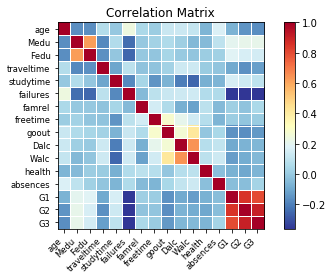

The R-Squared:  0.8183615327781372
G1 :  0.13991881518797403
G2 :  0.9458819432484956
Medu :  0.06455769559538953
failures :  -0.13132495554791976
sex :  0.29495709632937517
famsize :  0.35723149399669524
studytime :  -0.4116314655431147
internet :  0.20402996220682917
absences :  0.02807056625530861
school :  -0.13281050032496405
The intercept of our slope is:  -0.9777106888317348


In [4]:
data1=pd.read_csv('student-mat.csv')
data1.head(50)
data1['famsize'].value_counts()
data1.shape
data1.info()
data1.describe()
data1.isnull().sum()
data1.corr()
cor = data1.corr()
plt.figure(figsize=(19,15))
sm.graphics.plot_corr(cor, xnames=list(cor.columns))
plt.show()
lb = LabelBinarizer()
data1.sex = lb.fit_transform(data1.sex)
data1.sex.unique()
data1['famsize'].value_counts()
data1.famsize = lb.fit_transform(data1.famsize)
data1.famsize.unique()
data1['internet'].value_counts()
data1.internet= lb.fit_transform(data1.internet)
data1.internet.unique()
data1.school= lb.fit_transform(data1.school)
data1.school.unique()
data1['school'].value_counts()
yy=data1["G3"]
y=np.array(yy)
xx=data1[["G1","G2","Medu","failures","sex","famsize","studytime","internet","absences","school"]]
X= np.array(xx)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.8, random_state=123)
multiple_reg = LinearRegression()
multiple_reg.fit(X_train,y_train)
print("The R-Squared: ",multiple_reg.score(X_test, y_test))
alpha = multiple_reg.coef_
beta = multiple_reg.intercept_

for i in range(len(alpha)):
    print(xx.columns[i], ': ', alpha[i])
print('The intercept of our slope is: ', beta)


<b>Our model is given by: G3=0.14G1 + 0.95G2 + 0.06Medu - 0.13failures + 0.29sex + 0.36famsize - 0.41studytime +0.20internet +0.03absences - 0.13school - 0.98